In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set()

In [0]:
test_df = pd.read_csv('titanic-test.csv' )

train_df = pd.read_csv('titanic-train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


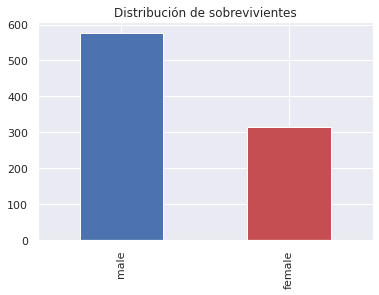

In [0]:
train_df.Sex.value_counts().plot(kind = 'bar', color = ['b', 'r'])
plt.title('Distribución de sobrevivientes')
plt.show()

In [0]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [0]:
#Recuerda de cada ser siempre hay que dividir y obtener aquellos datos que sean útiles

from  sklearn import preprocessing
#Vamos a crear  un label encoder, el cual no tiene un parámetro adicional
label_encoder = preprocessing.LabelEncoder()
#Vamos a transformar la info de la columna Sex a números
encoder_sex = label_encoder.fit_transform(train_df['Sex'])

In [0]:
#Aquí estaremos arreglando  los valores que se encuentran con "na" por el promedio.
#Es recomendable cambiarlo por el promedio, ya que este no afectaría en los valores representativos: Media, desv. estandar, etc
#La instrucción ".fillna()" hace ese relleno
# "train_df['Age'].median()" con esto estamos extrayendo la media de la columna 'Age'
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())

# Aquí estamos cambiando los espacios vacíos que hay en 'Embarked' por la letra 'S'
train_df['Embarked'] = train_df['Embarked'].fillna('S')



#### DATO: 
Cuando **se hace el  " .drop() "  intentando eliminar algunas variables** que no serán de interés, **axis = 1 indica que estas variables son "columnas "** , axis = 0 , indicaría que son filas.

In [0]:
#Vamos a quitar columnas de datos que no nos van a ser útiles para nuestra predicción
#Lo hacemos mediante ".drop()" dentro de ello le ponemos los features que queremos borrar
#Con "axis = 1" le estamos diciendo en qué posición de nuestro dataset se encuentra de
train_predictors = train_df.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis =1)


#### Dataso:
**Talking abot the conditional " train_predictors[cname].nunique() < 10 "**

Lo que sucede es que puedes tener una variable categórica que tenga “muchos” valores distintos, entonces lo que hace esa porción de código es que toma las variables cuya cantidad de valores distintos no sea mayor a 10.

In [0]:
#Ahora tomaremos los datos categóricos o variables categóricas
#Recorremos las variables categoricas y las dejamos si cumplen las condiciones de tener menos de 10 valores únicos
#Cabe mencionar que cname es una variable interna y estaría tomando los nombres de cada columna. Prueba esto " print(train_predictors.columns) " 
categorical_cols = [cname for cname in train_predictors.columns if
                         train_predictors[cname].nunique() < 10 and
                         train_predictors[cname].dtype == 'object' # Aquí le estamos dando una condición adicional y es que debe 
                   ]                                               # también que el tipo de dato es "objeto".Si es un tipo de dato "objeto", entonces es una variable categórica
#print(train_predictors.columns)

In [0]:
#Tomaremos las variables numéricas
#Recorremos también con "cname" 
#La condición aquí es que las columnas deben de ser de "tipo numérico".En este caso deben ser de tipo entero o de tipo flotante


numerical_cols = [cname for cname in train_predictors.columns if
                    train_predictors[cname].dtype in ['int64', 'float64']              
                                                    ]

In [0]:
#Ahora los vamos a unir para tenerlas en una sola variable

my_cols = categorical_cols + numerical_cols
#Ahora a train predictors le estamos dando las variables que queremos para elentrenamiento
train_predictors = train_predictors[my_cols]

In [0]:
#Ahora crearemos un dummy que sea lo suficientemente amplio para tener una predicción más precisa

#las dummy variables que se mencionan ligeramente convierten las variables categóricas en indicadoras como 0,1,2,…etc
#Recuerda ver el video para que te quede más claro, lo dejaste en los comentarios de  "Creando un clasificador cn Scikit - Learn"
dummy_encoded_train_predictors = pd.get_dummies(train_predictors)

### Pasamos al entrenamiento del algoritmo

In [0]:
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [0]:
y_target = train_df['Survived'].values
x_features_one = dummy_encoded_train_predictors.values

##### Pasamos a dividir la información

In [0]:
X_train, X_validation, Y_train, Y_validation = train_test_split(x_features_one, y_target, test_size = 0.25, random_state = 0)

##### Pasamos a modelar nuestro arbol de decisión

In [0]:
tree_one = tree.DecisionTreeClassifier()
tree_one = tree_one.fit(X_train, Y_train ) # Entrenamos nuestro algoritmo con esta instrucción ,le pasamos nuestros features y nuestras etiquetas (o el resultado) de entrenamiento


#### Ahora validamos qué tan bien está entrenado. 

In [0]:
###Veremos qué tan cercano del valor real estaría, qué tan cercano al 100% está

# ".score()" es lo que va a calcular dada "la info. que tenemos para etrenar" y "dada la etiqueda que ha obtenido"    
tree_one_accuracy = round(tree_one.score(X_validation, Y_validation), 4) # Aquí estamos pasandole


#Imprimimos lo que ha encontrado, la información de nuestra precisión.
#Además le indicamos que solo escriba 4 flotantes con " %0.4f"

print('Accuracy: %0.4f' %(tree_one_accuracy))

Accuracy: 0.7534


### Vamos a proceder a visualizar los datos

In [0]:
from io import StringIO
from IPython.display import Image, display # Lo utilizaremos para mostrar
import pydotplus

In [0]:
out = StringIO()
tree.export_graphviz(tree_one,out_file = out)

graph = pydotplus.graph_from_dot_data(out.getvalue())
graph.write_png('titanic.png')

True

In [4]:
import numpy as np
are = np.array([1,5,4,2,6,1])
ar = np.sort(are)
certr = np.zeros(4)
print(certr)

[0. 0. 0. 0.]
